In [2]:
import os
import json
import h5py
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
import sys

import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

RAW_DATA_DIR = "../input/raw_data" # 카카오에서 다운로드 받은 데이터의 디렉터리
PROCESSED_DATA_DIR = '../input/processed' # 전처리된 데이터가 저장될 디렉터리
VOCAB_DIR = os.path.join(PROCESSED_DATA_DIR, 'vocab') # 전처리에 사용될 사전 파일이 저장될


preprocessed_train_df = pd.read_csv(os.path.join(PROCESSED_DATA_DIR, 'train.csv'))

In [4]:
preprocessed_train_df.head(20)

,pid,tokens,bcateid,mcateid,scateid,dcateid
0,O4486751463,▁직소퍼즐 ▁1000 조각 ▁바다 거북 의 ▁여행 ▁pl 12 75,1,1,2,-1
1,P3307178849,▁모리케이스 ▁아이폰 6 s ▁6 s ▁tree ▁farm 101 ▁다이어리케이스 ...,3,3,4,-1
2,R4424255515,▁크리비아 ▁기모 ▁3 부 ▁속바지 ▁gl g 43 14 p,5,5,6,-1
3,F3334315393,▁하프클럽 ▁잭앤질 ▁남성 ▁솔리드 ▁절개라인 ▁포인트 ▁포켓 ▁팬츠 ▁311 33...,7,7,8,-1
4,N731678492,▁코드 프리 혈 당 시험 지 50 매 ▁코드 프리 시험 지 ▁최 장 유 효 기간,10,9,11,-1
5,J4094617432,▁아트박스 ▁poom ▁낭만창고 ▁idk 385 ▁시원한 ▁맥주 ▁캬 하,11,10,12,-1
6,V4742097320,▁데 버스 ▁뉴 ▁캠핑 ▁bbq ▁글러브 ▁dv c ▁e 1209 n ▁캠핑 ▁등산,12,11,13,-1
7,Z4154445264,▁엘르스포츠 ▁여성 ▁비키니 2 pcs ▁et fl b 06 nvy,13,12,14,-1
8,L2121928457,▁패션플러스 ▁geox ▁geox ▁제옥스 ▁gh ▁405 ▁블랙 펄 ▁클러치백,14,13,15,-1
9,J2944368118,▁아트박스 ▁poom ▁꾸밈 ▁iz 099 ▁우 럭 아 왜 우 럭,11,15,17,-1


In [16]:
preprocessed_train_df['pid_pre'] = preprocessed_train_df['pid'].apply(lambda x:x[0])

In [18]:
print(preprocessed_train_df['pid_pre'].unique())
print('#unique: ', preprocessed_train_df['pid_pre'].nunique())

['O' 'P' 'R' 'F' 'N' 'J' 'V' 'Z' 'L' 'T' 'I' 'W' 'H' 'Y' 'X' 'M' 'S' 'U'
 'G' 'Q' 'K']
#unique:  21


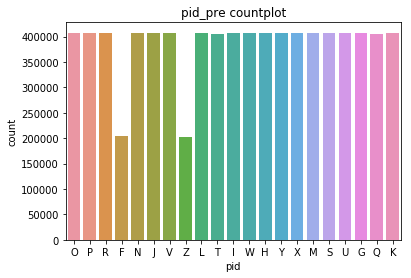

In [20]:
sns.countplot(preprocessed_train_df['pid'].apply(lambda x:x[0]))
plt.title('pid_pre countplot')
plt.show()
#거의 약 40만개로 비슷, F와 Z만 약 20만개 -> cateid와 관계 없는 듯, 각 pre마다의 비율이 비슷

In [33]:
train_df_pidpre_O = preprocessed_train_df[preprocessed_train_df['pid'].apply(lambda x:x[0]=='P')]

In [26]:
train_df_pidpre_O.head()

,pid,tokens,bcateid,mcateid,scateid,dcateid,pid_pre
0,O4486751463,▁직소퍼즐 ▁1000 조각 ▁바다 거북 의 ▁여행 ▁pl 12 75,1,1,2,-1,O
13,O4109219298,▁한일 ▁엘린 ▁el in ▁올 파이브 ▁통오중 ▁5 ply ▁냄비 5 종 ▁10 pcs,16,19,21,-1,O
57,O4436052894,▁기타 ▁라벨루쏘 ▁롱 샴 ▁르 ▁플 리아 쥬 ▁백팩 ▁16 99 ▁0 89 ▁55...,31,55,64,11,O
95,O4593740867,▁gt ▁삼성 ▁광마우스 ▁sm h ▁3100 ub,24,73,98,-1,O
127,O4149499960,▁보리보리 ▁후추통 ▁이미용 ▁생활 ▁p 06 80 ▁옥 탄 트 ▁귀걸이 ▁은침 ▁...,20,60,113,-1,O


In [31]:
def get_vc_df(df, col):    
    vc_df = df[col].value_counts().reset_index()
    vc_df.columns = [col, 'count']
    vc_df['percentage'] = (vc_df['count'] / vc_df['count'].sum())*100    
    return vc_df

In [38]:
vc_df = get_vc_df(preprocessed_train_df, 'bcateid')
vc_df.head(10)

,bcateid,count,percentage
0,14,572932,7.042960
1,9,470785,5.787284
2,16,451696,5.552626
3,3,411935,5.063850
4,17,397516,4.886600
5,35,377532,4.640940
6,28,364307,4.478367
7,24,330966,4.068511
8,11,325045,3.995726
9,6,302799,3.722259


In [39]:
vc_df = get_vc_df(preprocessed_train_df, 'mcateid')
vc_df.head(10)

,mcateid,count,percentage
0,3,346249,4.256383
1,464,161607,1.986609
2,43,161309,1.982945
3,31,138939,1.707955
4,201,137116,1.685545
5,6,124864,1.534933
6,13,124378,1.528959
7,27,122925,1.511097
8,14,122757,1.509032
9,7,120284,1.478632


In [41]:
vc_df = get_vc_df(preprocessed_train_df, 'scateid')
vc_df.head(10)

,scateid,count,percentage
0,-1,1866120,22.939911
1,38,229532,2.821600
2,34,126353,1.553237
3,2071,67606,0.831070
4,149,66451,0.816871
5,195,53778,0.661084
6,51,47914,0.588999
7,375,47568,0.584746
8,53,47516,0.584106
9,33,46771,0.574948


In [42]:
vc_df = get_vc_df(preprocessed_train_df, 'dcateid')
vc_df.head(10)

,dcateid,count,percentage
0,-1,7376926,90.683356
1,5,72344,0.889313
2,10,60313,0.741418
3,8,53278,0.654938
4,6,50747,0.623825
5,4,29323,0.360463
6,14,26570,0.326621
7,39,23715,0.291525
8,195,22972,0.282391
9,190,17885,0.219857
